# Assignment: Data Wrangling and Exploratory Data Analysis
## Do Q1 and Q2, and one other question.
`! git clone https://www.github.com/DS3001/assignment2`

In [3]:
! git clone https://www.github.com/DS3001/assignment2

Cloning into 'assignment2'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 36 (delta 8), reused 5 (delta 5), pack-reused 24
Receiving objects: 100% (36/36), 5.47 MiB | 11.22 MiB/s, done.
Resolving deltas: 100% (9/9), done.


**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?



1.   This paper is about a methodical way to clean data. The author points out how there is a lot of research into data analysis but little into data cleaning. Thus, this paper covers what he calls "tidy data."
2.   The tidy data standard is created to give a baseline standard for what a clean data set looks like. Often, more data cleaning might be needed to support different analyses or added data. However, the tidy data standard is met to be a common standard starting point for dataset cleaning.
3. The first sentence presented in the question means that a clean or tidy dataset is similar to all other tidy datasets because they follow the same standards. However, a messy dataset is a unique kind of messy. All untidy datasets do not have the same standards, so the path to making them tidy is going to be different for everyone. The second sentence means that variables and observations are very easy to identify but hard to define. Observations and variables also depend on the data's context. Variables are for an "underlying attribute," and observations are for measured values across attributes.
4. Values are numerical or textual inputs. Each value belongs to a variable and an observation. A variable is a measurable category or attribute, like height. An observation is what or who that value belongs to, like a person.
5. Tidy data is when every variable creates a column, and each observation creates a row. A table is made up of only one observational unit.
6. The five most common problems with messy data are column headers with values, multiple variables in one column, variables stored in columns and rows, more than one observational unit stored in one table, and one observational unit stored across many tables. The table in Table 4 is messy because there are values in the column header. It should instead be religion, income, and frequency as the columns or variables. Melting the dataset means to pivot it longer or to stack the data. In practice, this means to turn columns into rows.
7. Table 11 is messy because the day should be a variable with the date as a value. All of the d1,d2, etc., should be values for the day variable. Additionally, tmin and tmax are variables, so they should be columns; Table 12 is molten because now the date is one column. Then, the second table is tidy because tmin and tmax each have their own column as separate variables.
8. The "chicken-and-egg" problem with tidy data is that tidy data is only as useful as the tools built around it. Tidy tools are only as useful as the tidy data. This makes breaking out of this box hard for future explanation. As such, Wickham wants to see more frameworks developed for data cleaning. He does not suggest tidy data is the best solution; instead, he hopes to shed light on a part of data science that needs more attention.

**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
airbnb = pd.read_csv('./assignment2/data/airbnb_hw.csv')
airbnb['Price'].unique()
# I notice that the values are all objects and anything above 999 has a comma


airbnb['Price']=airbnb['Price'].str.replace(',','') # replacing commas with empty strings
airbnb['Price']=pd.to_numeric(airbnb['Price'], errors = 'coerce') # changing data type from string to number
# I thought price should be a number, so that we can calcuate
# statistical descriptors with these numbers

airbnb['Price'+'_nan'] = airbnb['Price'].isnull()
print('Total Missings: \n', sum(airbnb['Price'+'_nan']),'\n')
# There are zero missing values
airbnb['Price'].unique()


Total Missings: 
 0 



array([  145,    37,    28,   199,   549,   149,   250,    90,   270,
         290,   170,    59,    49,    68,   285,    75,   100,   150,
         700,   125,   175,    40,    89,    95,    99,   499,   120,
          79,   110,   180,   143,   230,   350,   135,    85,    60,
          70,    55,    44,   200,   165,   115,    74,    84,   129,
          50,   185,    80,   190,   140,    45,    65,   225,   600,
         109,  1990,    73,   240,    72,   105,   155,   160,    42,
         132,   117,   295,   280,   159,   107,    69,   239,   220,
         399,   130,   375,   585,   275,   139,   260,    35,   133,
         300,   289,   179,    98,   195,    29,    27,    39,   249,
         192,   142,   169,  1000,   131,   138,   113,   122,   329,
         101,   475,   238,   272,   308,   126,   235,   315,   248,
         128,    56,   207,   450,   215,   210,   385,   445,   136,
         247,   118,    77,    76,    92,   198,   205,   299,   222,
         245,   104,

In [9]:
sharks = pd.read_csv('./assignment2/data/sharks.csv')
sharks['Type'].unique()
# I notice that there are only 3 real categories within the Types column: Unprovoked, Provoked, and Unknown
# Unknown could mean it was unknown the type or the wrong data was inputed so we still don't know the type of attack

# I decided to do this instead of Nan for all entries besides provoked and unprovoked because the data are not missing
# Instead, the value is unsure,so I think unknown is more accurate than Nan

list_of_unknown = ['Questionable', 'Watercraft', 'Uncofirmed', 'Unverified',
                   'Invalid', 'Under investigation', 'Boating', 'Sea Disaster',
                   'Boat', 'Boatomg', 'Unconfirmed']
sharks['Type'] = sharks['Type'].replace(list_of_unknown, 'Unknown')
# I left the Nan values in the dataset as is because they are not unknown they are Nan
sharks['Type'].unique()


<ipython-input-9-3a2f9866eea6>:1: DtypeWarning: Columns (10,17,18,19,20,21,24) have mixed types. Specify dtype option on import or set low_memory=False.
  sharks = pd.read_csv('./assignment2/data/sharks.csv')


array(['Unprovoked', 'Provoked', 'Unknown', nan], dtype=object)

In [ ]:
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
pretrial = pd.read_csv(url,low_memory=False) # Pandas downloads and loads the .csv file for you


In [9]:
var = "WhetherDefendantWasReleasedPretrial"
pretrial[var].unique()
# possible values are 9,0,1
# replace 9 with np.nan becuase this is the missing value input per the codebook
pretrial[var+'_nan'] = pretrial[var].isnull()
print('Before Total Missings: \n', sum(pretrial[var+'_nan']),'\n')

pretrial[var] = pretrial[var].replace(9,np.nan)
pretrial[var+'_nan'] = pretrial[var].isnull()
print('After Total Missings: \n', sum(pretrial[var+'_nan']),'\n')


Before Total Missings: 
 0 

After Total Missings: 
 31 



In [10]:
var1 = 'ImposedSentenceAllChargeInContactEvent'
var2 = 'SentenceTypeAllChargesAtConvictionInContactEvent'
#print(pretrial[var2].unique())
#print(pretrial[var1].unique())

pretrial[var1]= pretrial[var1].replace(" ",np.nan)
pretrial[var1]=pd.to_numeric(pretrial[var1])
pretrial[var1+'_nan'] = pretrial[var1].isnull()
print('After Total Missings: \n', sum(pretrial[var1+'_nan']),'\n')
pretrial[var1].value_counts()
pretrial[var2].value_counts()
# This is correct now because the values from var2 with 9 and 4
# The total sum of 9 and 4 values equals the missing values from
# var1

After Total Missings: 
 9053 



4    8779
0    8720
1    4299
2     914
9     274
Name: SentenceTypeAllChargesAtConvictionInContactEvent, dtype: int64

**Q3.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Notice that your graph is "bi-modal", having two little peaks that represent locally most common values. Now group your graph by `level` and `control`. What explains the bi-modal nature of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [39]:
df = pd.read_csv("./assignment2/data/college_completion.csv")

In [12]:
# this prints the dimensions
print(df.shape)
# There are 3798 observations in this dataset with 63 variables

# these are the columns or variables
print(df.columns)
# these data contain information about college all over the US
# information on admission stats like SAT score to graduation rates
df.head()


(3798, 63)
Index(['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control',
       'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count',
       'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value',
       'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value',
       'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile',
       'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile',
       'endow_value', 'endow_percentile', 'grad_100_value',
       'grad_100_percentile', 'grad_150_value', 'grad_150_percentile',
       'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile',
       'ft_fac_value', 'ft_fac_percentile', 'vsa_year',
       'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first',
       'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first',
       'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first',
       'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [13]:
pd.crosstab(df['control'], df['level'])
# I notice there are very very few private 2 year schools
# Whereas the private for-profit are split up pretty evenly between 2 and 4 years
# There are more public schools that are only 2 year colleges than 4-year

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


<Axes: >

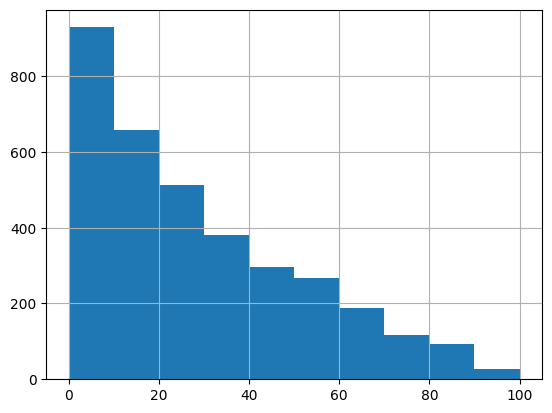

In [14]:
#For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.

df['grad_100_value'].hist()


<Axes: ylabel='Density'>

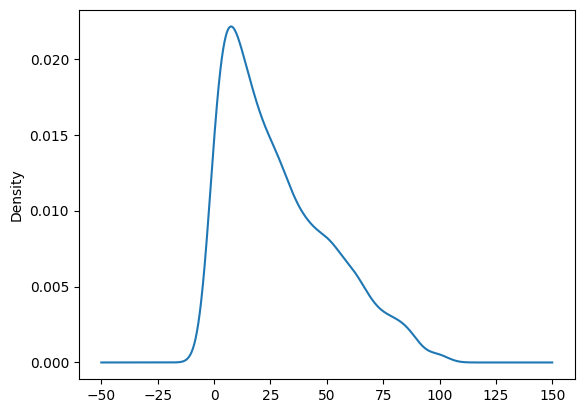

In [15]:
df['grad_100_value'].plot.density()

<Axes: >

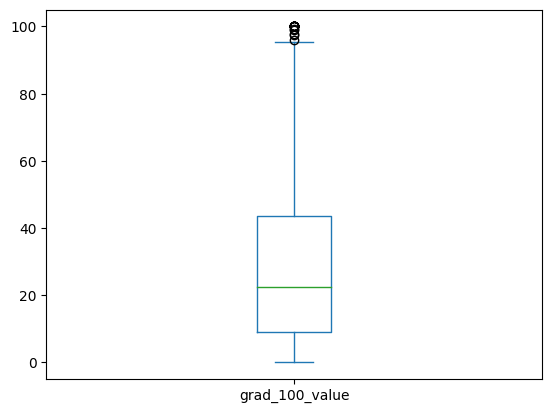

In [16]:
df['grad_100_value'].plot.box()

In [17]:
print(df['grad_100_value'].describe())

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


For grad_100_value, create a grouped kernel density plot by control and by level. Describe what you see. Use groupby and .describe to make grouped calculations of statistical descriptions of grad_100_value by level and control. Which institutions appear to have the best graduation rates?

<Axes: ylabel='Density'>

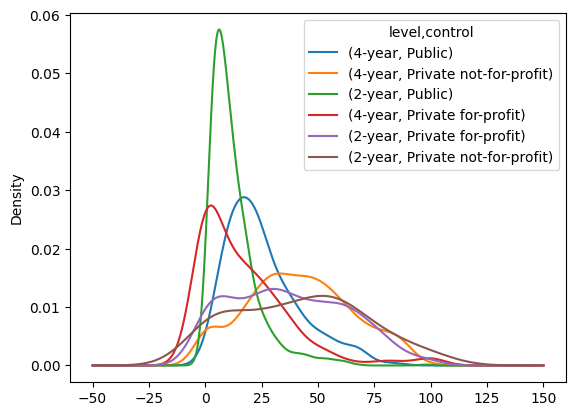

In [21]:
group_by = ['level','control']
var = 'grad_100_value'
df_wide = df.pivot(columns=group_by,values=var)
df_wide.plot.density()
# Overall this plot is concerning because no group of colleges has a peak at
# over 50, meaning graduation rates overall are low
# Two year public colleges have a very large peak early on
# It looks like 4 year private not for profit colleges as a
# little platue around 75-100 range, which is good
# 4 year private for-profit colleges has less of a range of values
# and are more clustered towards the low end

In [26]:
df_wide.describe()
# Looking at these data, 2 year not for profit schools have the highed median
# and mean graduation rate. 2 year public collges have the lowest median
# and mean graduation rate

level        4-year                           2-year             4-year  \
control      Public Private not-for-profit    Public Private for-profit   
count    573.000000            1121.000000  926.0000         318.000000   
mean      25.561082              41.645674   12.4000          17.382704   
std       16.403902              23.243453   10.8936          20.788525   
min        0.000000               0.000000    0.0000           0.000000   
25%       13.600000              25.000000    5.1000           0.000000   
50%       21.800000              41.000000    9.4000          12.500000   
75%       33.800000              57.800000   16.1750          26.325000   
max       86.300000             100.000000   97.8000         100.000000   

level               2-year                         
control Private for-profit Private not-for-profit  
count           461.000000              68.000000  
mean             37.197614              41.913235  
std              25.497380              28.348302  
min               0.000000               0.000000  
25%              15.800000              16.225000  
50%              33.900000              44.400000  
75%              57.800000              61.200000  
max             100.000000             100.000000

<Axes: ylabel='Density'>

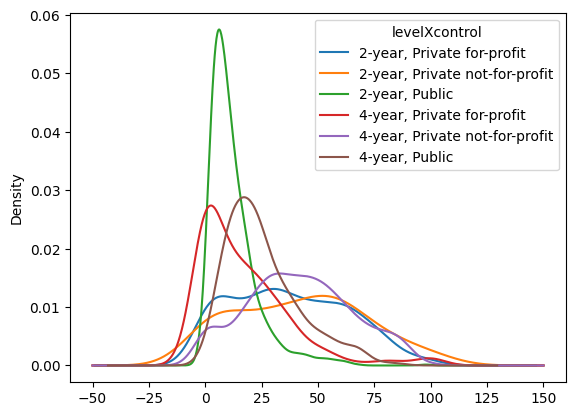

In [28]:
df['levelXcontrol']=df['level']+', '+df['control']
group_by = ['levelXcontrol']
var = 'grad_100_value'
df_wide = df.pivot(columns=group_by,values=var)
df_wide.plot.density()
# These results are very similar to the ones above
# The data do look more spread out in this plot

In [29]:
df_wide.describe()
# The highest gradutation rate is still a 2-year private not for profit school

levelXcontrol,"2-year, Private for-profit","2-year, Private not-for-profit","2-year, Public","4-year, Private for-profit","4-year, Private not-for-profit","4-year, Public"
count,461.000000,68.000000,926.0000,318.000000,1121.000000,573.000000
mean,37.197614,41.913235,12.4000,17.382704,41.645674,25.561082
std,25.497380,28.348302,10.8936,20.788525,23.243453,16.403902
min,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
25%,15.800000,16.225000,5.1000,0.000000,25.000000,13.600000
50%,33.900000,44.400000,9.4000,12.500000,41.000000,21.800000
75%,57.800000,61.200000,16.1750,26.325000,57.800000,33.800000
max,100.000000,100.000000,97.8000,100.000000,100.000000,86.300000


Make a kernel density plot of aid_value. Notice that your graph is "bi-modal", having two little peaks that represent locally most common values. Now group your graph by level and control. What explains the bi-modal nature of the graph? Use groupby and .describe to make grouped calculations of statistical descriptions of aid_value by level and control.


<Axes: ylabel='Density'>

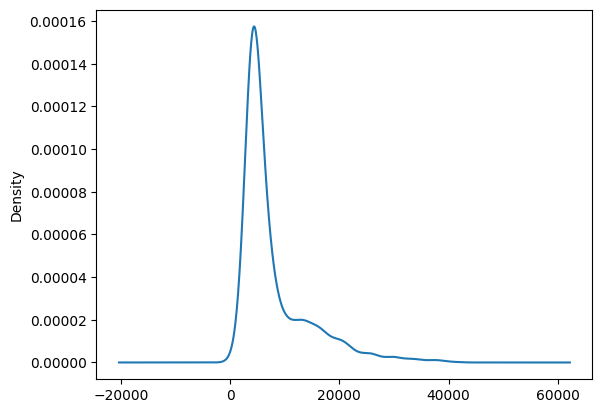

In [42]:
df['aid_value'].plot.density()

<Axes: ylabel='Density'>

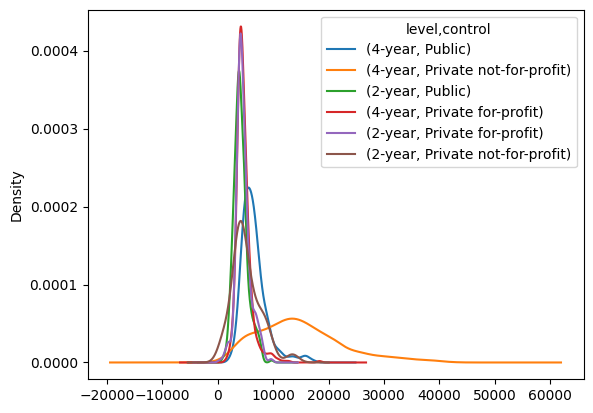

In [43]:
group_by = ['level','control']
var = 'aid_value'
df_wide = df.pivot(columns=group_by,values=var)
df_wide.plot.density()
# The bimodial feature of the othe graph comes from the first peak of all the
# groups of colleges except the 4 year private not-for-profit
# This group has a peak later, between the 10000 and 20000 mark
# The density plot above shows the outlint of both of these peaks
# giving it a bimodial shape

In [44]:
df_wide.describe()
# Looking at the stats, the 4 year private not-for-profit peak makes sense
# 4 year private not-for-profit schools have a max value that is more than
# double what the second max value is. This is true for almost all the other
# statistics given with the describe method

level          4-year                              2-year             4-year  \
control        Public Private not-for-profit       Public Private for-profit   
count      632.000000            1180.000000   926.000000         527.000000   
mean      6514.071203           14702.401695  4126.199784        4696.062619   
std       2353.716693            7649.775203  1260.271382        1489.410020   
min       2232.000000             902.000000   881.000000        1580.000000   
25%       4990.500000            9113.250000  3311.250000        3885.500000   
50%       6085.000000           13774.500000  3943.500000        4364.000000   
75%       7341.500000           18996.750000  4762.000000        5131.500000   
max      17299.000000           41580.000000  9809.000000       18355.000000   

level               2-year                         
control Private for-profit Private not-for-profit  
count           464.000000              68.000000  
mean           4559.681034            5128.058824  
std            1286.688269            2590.449946  
min             294.000000             934.000000  
25%            3818.750000            3650.000000  
50%            4286.500000            4516.500000  
75%            5122.000000            6311.500000  
max            9727.000000           13654.000000

Make a scatterplot of grad_100_value by aid_value. Describe what you see. Now make the same plot, grouping by level and then control. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

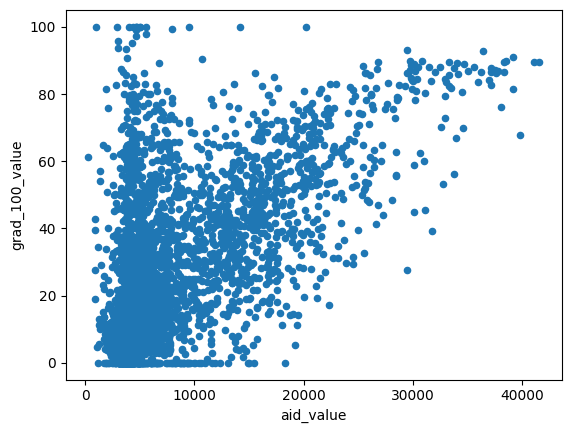

In [45]:
df.plot.scatter(y='grad_100_value',x='aid_value')
# as aid increases, so does graduation rates

ValueError: ignored

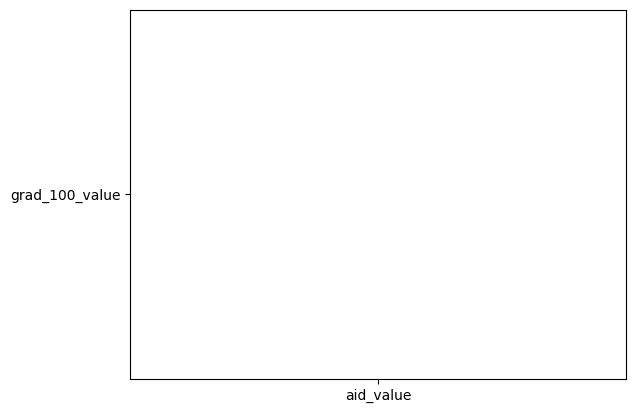

In [52]:
plt.scatter(y='grad_100_value',x='aid_value', c = 'level')
plt.show()

**Q4.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q5.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

**Q6.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.